In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0               Player   Nation    Pos  \
0              0    Maximilian Arnold   de GER     MF   
1              1      Nathaniel Clyne  eng ENG     DF   
2              2      Trevoh Chalobah  eng ENG     DF   
3              3       Atakan Karazor   de GER     MF   
4              4           Saša Lukić   rs SRB     MF   
...          ...                  ...      ...    ...   
1491        2490  Filippo Terracciano   it ITA  DF,FW   
1492        2495       Jonathan Viera   es ESP     MF   
1493        2496       Alan Virginius   fr FRA     FW   
1494        2505       Bryan Zaragoza   es ESP  FW,MF   
1495        2507         Nadir Zortea   it ITA     DF   

                            Squad  \
0                       Wolfsburg   
1                  Crystal Palace   
2                 Chelsea+Lorient   
3                       Stuttgart   
4     Fulham+Fulham+Torino+Torino   
...                           ...   
1491          Hellas Verona+Milan   
1492           Las Palmas+Almería   
1493          Lille+Clermont Foot   
1494        Granada+Bayern Munich   
1495           Frosinone+Atalanta   

                                                   Comp  Age    Born     MP  \
0                                         de Bundesliga  0.0  1994.0  126.0   
1                                    eng Premier League  0.0  1991.0   70.0   
2                         eng Premier League+fr Ligue 1  0.0  1999.0   87.0   
3                                         de Bundesliga  0.0  1996.0  105.0   
4     eng Premier League+eng Premier League+it Serie...  0.0  1996.0  119.0   
...                                                 ...  ...     ...    ...   
1491                                         it Serie A  0.0  2003.0   21.0   
1492                                         es La Liga  0.0  1989.0   21.0   
1493                                         fr Ligue 1  0.0  2003.0   16.0   
1494                           es La Liga+de Bundesliga  0.0  2001.0   28.0   
1495                                         it Serie A  0.0  1999.0   19.0   

      Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0      123.0  10852  120.5         0.11       0.22        0.09          0.19   
1       61.0   5474   60.8         0.00       0.03        0.00          0.03   
2       69.0   6246   69.5         0.09       0.13        0.09          0.13   
3       86.0   7520   83.5         0.00       0.07        0.00          0.07   
4       88.0   7817   86.9         0.13       0.17        0.08          0.13   
...      ...    ...    ...          ...        ...         ...           ...   
1491    15.0   1372   15.2         0.00       0.07        0.00          0.07   
1492    19.0   1529   17.0         0.12       0.35        0.00          0.24   
1493    13.0   1005   11.2         0.00       0.18        0.00          0.18   
1494    19.0   1821   20.2         0.30       0.40        0.25          0.35   
1495    14.0   1407   15.7         0.13       0.45        0.13          0.45   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.08          0.23        0.05            0.20                61.0   
1         0.01          0.04        0.01            0.04                40.0   
2         0.05          0.07        0.05            0.07                76.0   
3         0.02          0.08        0.02            0.07                85.0   
4         0.11          0.19        0.08            0.16                95.0   
...        ...           ...         ...             ...                 ...   
1491      0.02          0.02        0.02            0.02                31.0   
1492      0.21          0.59        0.12            0.36                41.0   
1493      0.12          0.15        0.12            0.15                24.0   
1494      0.21          0.32        0.17            0.27               145.0   
1495      0.03          0.19        0.03            0.19                52.0   

     

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0             Player   Nation    Pos                  Squad  \
0              0         Max Aarons  eng ENG     DF            Bournemouth   
1              1   Brenden Aaronson   us USA  MF,FW           Union Berlin   
2              4   Yunis Abdelhamid   ma MAR     DF                  Reims   
3              5  Salis Abdul Samed   gh GHA     MF                   Lens   
4              7    Laurent Abergel   fr FRA     MF                Lorient   
...          ...                ...      ...    ...                    ...   
1493         134  Alessandro Zanoli   it ITA  DF,FW     Salernitana+Napoli   
1494         135       Duván Zapata   co COL     FW        Torino+Atalanta   
1495         136     Bryan Zaragoza   es ESP  FW,MF  Granada+Bayern Munich   
1496         138       Nadir Zortea   it ITA     DF     Frosinone+Atalanta   
1497         139        Milan Đurić   ba BIH     FW    Hellas Verona+Monza   

                          Comp  Age    Born  MP  Starts   Min   90s  \
0           eng Premier League  0.0  2000.0  20      13  1237  13.7   
1                de Bundesliga  0.0  2000.0  30      14  1267  14.1   
2                   fr Ligue 1  0.0  1987.0  31      31  2781  30.9   
3                   fr Ligue 1  0.0  2000.0  27      17  1519  16.9   
4                   fr Ligue 1  0.0  1993.0  33      32  2860  31.8   
...                        ...  ...     ...  ..     ...   ...   ...   
1493                it Serie A  0.0  2000.0  21      10   973  10.8   
1494                it Serie A  0.0  1991.0  37      36  2992  33.2   
1495  es La Liga+de Bundesliga  0.0  2001.0  28      19  1821  20.2   
1496                it Serie A  0.0  1999.0  19      14  1407  15.7   
1497                it Serie A  0.0  1990.0  37      26  2461  27.4   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.00       0.07        0.00          0.07      0.00   
1            0.14       0.28        0.14          0.28      0.14   
2            0.13       0.13        0.10          0.10      0.11   
3            0.00       0.00        0.00          0.00      0.05   
4            0.06       0.09        0.06          0.09      0.04   
...           ...        ...         ...           ...       ...   
1493         0.00       0.19        0.00          0.19      0.02   
1494         0.39       0.51        0.39          0.51      0.34   
1495         0.30       0.40        0.25          0.35      0.21   
1496         0.13       0.45        0.13          0.45      0.03   
1497         0.33       0.40        0.29          0.36      0.27   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.06        0.00            0.06                34.0   
1             0.27        0.14            0.27                77.0   
2             0.12        0.09            0.09                15.0   
3             0.08        0.05            0.08                19.0   
4             0.10        0.04            0.10                65.0   
...            ...         ...             ...                 ...   
1493          0.02        0.02            0.02                26.0   
1494          0.44        0.34            0.44               114.0   
1495          0.32        0.17            0.27               145.0   
1496          0.19        0.03            0.19                52.0   
1497          0.39        0.19            0.21                 7.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              14.0            41.2              12.0               35.3   
1              34.0            44.2              41.0               53.2   
2               8.0            53.3               7.0               46.7   
3               7.0            36.8              11.0               57.9   
4              44.0            67.7              18.0               27.7   
...             ...             ...               ...                ...   
1493            6.0       

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (DF) and midfielders (MF) from the 'final_player' DataFrame
defender_players = final_player[final_player['Pos'].isin(['DF', 'MF,DF','DF,MF','MF'])]

#player_2021 = player_2021[player_2021['Pos'].isin(['DF', 'MF,DF','DF,MF','MF'])]

player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]

player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

#player_2024 = player_2024[player_2024['Pos'].isin(['DF', 'MF,DF','DF,MF','MF'])]

# Reset the index if needed
defender_players = defender_players.reset_index(drop=True)

player_2021 = player_2021.reset_index(drop=True)


In [6]:
Kimmich=final_player[final_player['Player']=='Joshua Kimmich']
Kimmich

Unnamed: 0          Player  Nation    Pos          Squad           Comp  \
297         297  Joshua Kimmich  de GER  MF,DF  Bayern Munich  de Bundesliga   

     Age    Born     MP  Starts   Min    90s  Goals_per90  G+A_per90  \
297  0.0  1995.0  116.0   112.0  9653  107.3         0.12       0.41   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
297        0.11           0.4      0.07          0.35        0.07   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
297            0.34               128.0           73.0           57.03   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
297              48.0               37.5           100.4   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
297                    3.13                   18.68                    54.7   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
297                   27.76                    0.91   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
297                     100.39                       1.19   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
297                  0.68                     0.45           57.85   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
297                 317.59                               139.09   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
297                        1.82                 1.8   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
297                         0.13                 1.1                 0.74   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
297                   69.76                                2.69   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
297                        5.14                     0.65   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
297                   3.02                   1.85                  0.05   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
297               0.1                     0.06                   3.02   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
297                   0.38                   0.22                  0.01   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
297              0.02                     0.01                   0.01   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
297            8239.0            9760.0              84.42        153966.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
297         51937.0            3731.0            4041.0              92.31   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
297             3629.0             4027.0               90.12   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
297           1033.0           1684.0             61.34            0.06   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
297        0.27       0.35          0.01               2.81   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
297               8.66                        2.16   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
297                         0.34                      10.48   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
297                    90.96                    79.21   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
297                     11.3                     3.95                  0.62   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
297             0.63            7.38                    1.59   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
297                 5.76                    2.53                

In [7]:
Kimmich_2021=player_2021[player_2021['Player']=='Joshua Kimmich']
Kimmich_2021

Unnamed: 0          Player  Nation Pos          Squad           Comp  \
150      1316.0  Joshua Kimmich  de GER  MF  Bayern Munich  de Bundesliga   

      Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
150  25.0  1995.0  27.0    25.0  2194  24.4         0.16       0.57   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
150        0.16          0.57       0.1          0.37         0.1   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
150            0.37                37.0           29.0            78.4   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
150               8.0               21.6           96.97   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
150                    3.11                   16.84                   52.79   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
150                   28.24                    1.07   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
150                      96.97                       1.52   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
150                  1.19                     0.33           57.42   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
150                 361.11                               168.11   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
150                        2.21                2.17   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
150                          0.2                1.68                 0.82   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
150                   67.42                                 2.7   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
150                        5.17                     0.82   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
150                   3.36                   1.56                  0.04   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
150              0.16                     0.04                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
150                   0.57                   0.25                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
150               0.0                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
150            1778.0            2131.0               83.4         35284.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
150         11678.0             652.0             721.0               90.4   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
150              777.0              864.0                89.9   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
150            290.0            446.0              65.0             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
150        0.27       0.35          0.14                2.7   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
150               9.14                         2.3   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
150                         0.41                       11.8   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
150                    87.34                    75.78   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
150                    11.07                     4.26                  0.29   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
150             1.11            7.21                    1.07   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
150                 5.74                    2.75                     2.1

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
kimmich_percentile_ranks = round(players_percentile_ranks.iloc[[150]],0)

# Print the percentile ranks for Declan Rice
kimmich_percentile_ranks


Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
150         81.0       97.0        85.0          97.0      72.0          92.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
150        77.0            94.0                67.0           74.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
150            78.0              44.0               17.0            98.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
150                    87.0                    85.0                    94.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
150                    97.0                    56.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
150                       98.0                       55.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
150                  70.0                     37.0            96.0   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
150                   99.0                                 97.0   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
150                        80.0                85.0   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
150                         62.0                72.0                 50.0   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
150                    95.0                                68.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
150                        99.0                     99.0   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
150                   98.0                   99.0                  37.0   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
150              78.0                     30.0                   20.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
150                   98.0                  100.0                  41.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
150              37.0                     38.0                   45.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
150              96.0              96.0               55.0            98.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
150            99.0              86.0              85.0               66.0   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
150               97.0               97.0                68.0   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
150             99.0             99.0              47.0            48.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
150        97.0      100.0          97.0               98.0   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
150               97.0                        98.0   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
150                         95.0                      100.0   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
150                     97.0                     96.0   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
150                    100.0                     98.0                  94.0   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
150             92.0            99.0                    97.0   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
150                100.0                   100.0                    100.0   

     Str_Corner_Kicks_per_90  Passes_Cmp_per_90  Passes_Off_per_90  \
150                     46.0               96.0               95.0   

     Passes_Blocked_per_90  Shots_total_per90  Shots_on_target_per90  \
150                   33.0     

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
kimmich_percentile_ranks_sorted = kimmich_percentile_ranks.T.sort_values(by=150, ascending=False)

# Get the top 20 parameters
top_30_params = kimmich_percentile_ranks_sorted.index[:30]
top_30_params_values = kimmich_percentile_ranks_sorted[150].head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index(['Out_Corner_Kicks_per_90', 'In_Corner_Kicks_per_90',
       'Progressive_Passes_per_90', 'Pass_Dead_Goal_per_90', 'xA_per_90',
       'Dead_Ball_Passes_per_90', 'Corner_Kicks_per_90',
       'Goal_Creating_Action_90', 'Total_Distance_per_90', 'Crosses_per_90',
       'Shot_Creating_Action_per90', 'Passes_Long_Att', 'Passes_PrgDist',
       'Passes_Long_Cmp', 'Pass_Dead_Shot_per_90', 'Pass_Live_Shot_per_90',
       'Tocuhes_Live_Balls_per_90', 'Free_Kick_Passes_per_90',
       'Pass_Live_Goal_per_90', 'Passes_Penalty_Area_per_90', 'Touches_per_90',
       'Key_Passes_per_90', 'Passes_TotDist', 'A-xAG_per_90',
       'Touches_Att_3rd_per_90', 'Passes_1/3_per_90', 'G+A-PK_per90',
       'Progressive_Distance_Carried_per_90', 'Passes_Medium_Att',
       'Throw_Ins_Taken_per_90'],
      dtype='object')
Values:
Out_Corner_Kicks_per_90                100.0
In_Corner_Kicks_per_90                 100.0
Progressive_Passes_per_90              100.0
Pass_Dead_Goal_per_90 

In [10]:
params = [
    'Progressive_Passes_per_90', 
    'Goal_Creating_Action_90', 
    'Shot_Creating_Action_per90', 
    'xA_per_90', 
    'Touches_per_90', 
    'Passes_Penalty_Area_per_90', 
    'Pass_Live_Goal_per_90', 
    'Key_Passes_per_90', 
    'Passes_1/3_per_90', 
    'Passes_Attempted_per_90', 
    'Through_Balls_per_90', 
    'Touches_Att_3rd_per_90', 
    'Ball_Recoveries_per_90', 
    'Crosses_per_90', 
    'npxG+xAG_per90'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Robert Lewandowdski's stats from the percentile ranks DataFrame
kimmich_percentile_ranks = round(players_percentile_ranks.iloc[[150]],0)

# Print the percentile ranks for Robert Lewandowski
print(kimmich_percentile_ranks)

     Progressive_Passes_per_90  Goal_Creating_Action_90  \
150                      100.0                     99.0   

     Shot_Creating_Action_per90  xA_per_90  Touches_per_90  \
150                        99.0      100.0            98.0   

     Passes_Penalty_Area_per_90  Pass_Live_Goal_per_90  Key_Passes_per_90  \
150                        98.0                   98.0               98.0   

     Passes_1/3_per_90  Passes_Attempted_per_90  Through_Balls_per_90  \
150               97.0                     97.0                  94.0   

     Touches_Att_3rd_per_90  Ball_Recoveries_per_90  Crosses_per_90  \
150                    97.0                    96.0            99.0   

     npxG+xAG_per90  
150            94.0  


In [11]:
kimmich_percentile_ranks_list = kimmich_percentile_ranks.values.flatten().tolist()

kimmich_percentile_ranks_list

[100.0,
 99.0,
 99.0,
 100.0,
 98.0,
 98.0,
 98.0,
 98.0,
 97.0,
 97.0,
 94.0,
 97.0,
 96.0,
 99.0,
 94.0]

In [12]:
split_params = [param.replace('_', '\n') for param in params]


In [13]:
image_path = "Kimmich.jpeg"
fdj_cropped = Image.open(image_path)


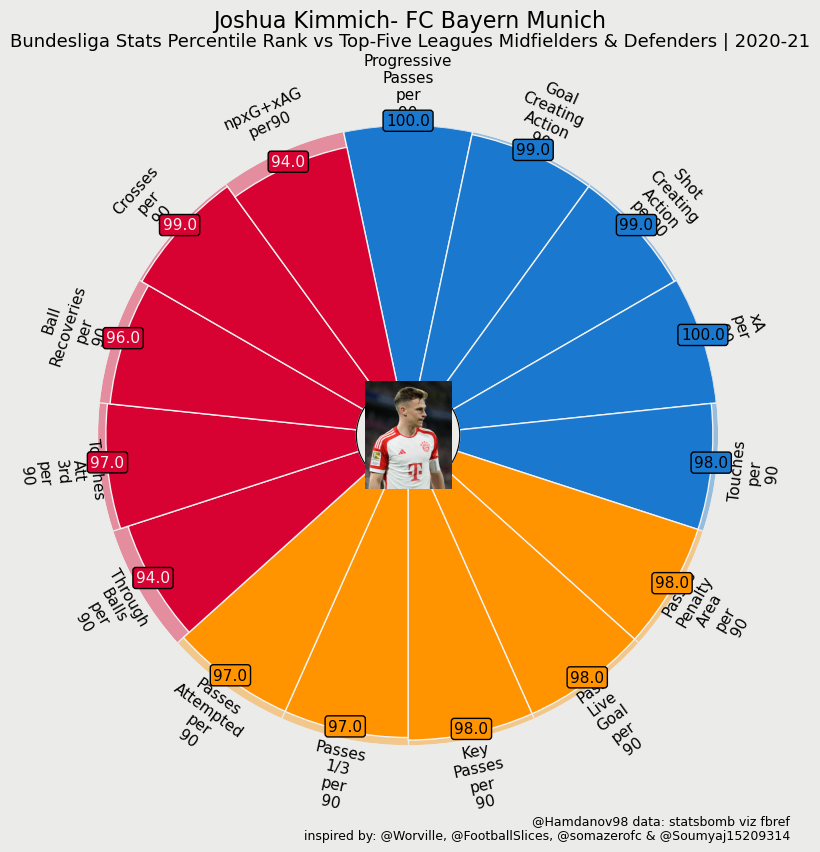

In [14]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kimmich_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Joshua Kimmich- FC Bayern Munich", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Midfielders & Defenders | 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kimmich_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]
        player_2021[feature]=-player_2024[feature]

C:\Users\user\AppData\Local\Temp\ipykernel_11604\2594505521.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_2024[feature]=-player_2024[feature]


In [16]:
Kimmich_2021=player_2021[player_2021['Player']=='Joshua Kimmich']
Kimmich_2021

Unnamed: 0          Player  Nation Pos          Squad           Comp  \
150      1316.0  Joshua Kimmich  de GER  MF  Bayern Munich  de Bundesliga   

      Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
150  25.0  1995.0  27.0    25.0  2194  24.4         0.16       0.57   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
150        0.16          0.57       0.1          0.37         0.1   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
150            0.37                37.0           29.0            78.4   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
150               8.0               21.6           96.97   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
150                    3.11                   16.84                   52.79   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
150                   28.24                    1.07   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
150                      96.97                       1.52   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
150                  1.19                     0.33           57.42   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
150                 361.11                               168.11   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
150                        2.21                2.17   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
150                          0.2                 NaN                  NaN   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
150                   67.42                                 2.7   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
150                        5.17                     0.82   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
150                   3.36                   1.56                  0.04   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
150              0.16                     0.04                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
150                   0.57                   0.25                   0.0   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
150               0.0                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
150            1778.0            2131.0               83.4         35284.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
150         11678.0             652.0             721.0               90.4   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
150              777.0              864.0                89.9   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
150            290.0            446.0              65.0             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
150        0.27       0.35          0.14                2.7   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
150               9.14                         2.3   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
150                         0.41                       11.8   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
150                    87.34                    75.78   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
150                    11.07                     4.26                  0.29   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
150             1.11            7.21                    1.07   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
150                 5.74                    2.75                     2.1

In [17]:
player_2024=player_2024[player_2024['Player']!='Joshua Kimmich']
player_2024=pd.concat([player_2024,Kimmich_2021])
player_2024=player_2024.reset_index(drop=True)
player_2024

Unnamed: 0                      Player   Nation Pos  \
0           5.0           Salis Abdul Samed   gh GHA  MF   
1           7.0             Laurent Abergel   fr FRA  MF   
2          28.0                 Yacine Adli   fr FRA  MF   
3          31.0            Michel Aebischer   ch SUI  MF   
4          62.0                Luis Alberto   es ESP  MF   
5          66.0               Rubén Alcaraz   es ESP  MF   
6          68.0                  Iván Alejo   es ESP  MF   
7          69.0                Carles Aleñá   es ESP  MF   
8          85.0               Edson Álvarez   mx MEX  MF   
9         108.0              Benjamin André   fr FRA  MF   
10        126.0            Oliver Arblaster  eng ENG  MF   
11        139.0           Maximilian Arnold   de GER  MF   
12        167.0             Neil El Aynaoui   fr FRA  MF   
13        173.0                Iddrisu Baba   gh GHA  MF   
14        178.0                Milan Badelj   hr CRO  MF   
15        189.0            Tiemoué Bakayoko   fr FRA  MF   
16        217.0              Nicolò Barella   it ITA  MF   
17        219.0                Ross Barkley  eng ENG  MF   
18        222.0    Leandro Barreiro Martins   lu LUX  MF   
19        223.0            Enzo Barrenechea   ar ARG  MF   
20        225.0               Pablo Barrios   es ESP  MF   
21        231.0                  Toma Bašić   hr CRO  MF   
22        265.0             Jude Bellingham  eng ENG  MF   
23        269.0                Fran Beltrán   es ESP  MF   
24        274.0            Carlos Benavídez   uy URU  MF   
25        275.0             Ismaël Bennacer   dz ALG  MF   
26        279.0              Nabil Bentaleb   dz ALG  MF   
27        280.0           Rodrigo Bentancur   uy URU  MF   
28        288.0                Sander Berge   no NOR  MF   
29        308.0              Philip Billing   dk DEN  MF   
30        313.0               Yves Bissouma   ml MLI  MF   
31        314.0        Leonardo Bittencourt   de GER  MF   
32        316.0              Antonio Blanco   es ESP  MF   
33        321.0                 Alexis Blin   fr FRA  MF   
34        333.0               Daniel Boloca   ro ROU  MF   
35        335.0         Giacomo Bonaventura   it ITA  MF   
36        337.0                Warren Bondo   fr FRA  MF   
37        357.0             Hicham Boudaoui   dz ALG  MF   
38        363.0                Edoardo Bove   it ITA  MF   
39        384.0           Marco Brescianini   it ITA  MF   
40        396.0              Josh Brownhill  eng ENG  MF   
41        422.0              Moisés Caicedo   ec ECU  MF   
42        423.0                 Tom Cairney  sct SCO  MF   
43        424.0                Jens Cajuste   se SWE  MF   
44        430.0            Hakan Çalhanoğlu   tr TUR  MF   
45        433.0               Lamine Camara   sn SEN  MF   
46        434.0                Mahdi Camara   fr FRA  MF   
47        435.0              Mohamed Camara   ml MLI  MF   
48        452.0              Étienne Capoue   fr FRA  MF   
49        456.0            Maxence Caqueret   fr FRA  MF   
50        464.0              Johnny Cardoso   us USA  MF   
51        484.0       Cristian Cásseres Jr.   ve VEN  MF   
52        493.0              Danilo Cataldi   it ITA  MF   
53        528.0            Pedro Chirivella   es ESP  MF   
54        531.0               Joris Chotard   fr FRA  MF   
55        535.0               Ryan Christie  sct SCO  MF   
56        539.0                  Pathé Ciss   sn SEN  MF   
57        547.0                Jordan Clark  eng ENG  MF   
58        563.0              Santi Comesaña   es ESP  MF   
59        569.0                  Lewis Cook  eng ENG  MF   
60        572.0            Francis Coquelin   fr FRA  MF   
61        585.0      David Pereira da Costa   pt POR  MF   
62        589.0                  Samu Costa   pt POR  MF   
63        593.0           Lassana Coulibaly   ml MLI  MF   
64        615.0                 Josh Cullen   ie IRL  MF   
65        632.0                      Danilo  

In [18]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [19]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [20]:
# Get Kimmich's row and compute cosine similarity
kimmich_2021_index = player_2024.index[player_2024['Player'] == 'Joshua Kimmich'][0]
kimmich_2021_data = transformed_df.loc[kimmich_2021_index].values.reshape(1, -1)

# Remove Kimmich from the dataset for comparison
transformed_df = transformed_df.drop(index=kimmich_2021_index)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, kimmich_2021_data).flatten()
transformed_df['similarity_to_kimmich_2021'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_kimmich_2021', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [22]:
# Visualize the results
player_2024['similarity_to_kimmich_2021'] = transformed_df['similarity_to_kimmich_2021']
player_2024_sorted = player_2024.sort_values(by='similarity_to_kimmich_2021', ascending=False)
player_2024_sorted

Unnamed: 0                      Player   Nation Pos  \
303      2691.0             Jordan Veretout   fr FRA  MF   
198      1782.0                 Luka Modrić   hr CRO  MF   
286      2577.0                 Teddy Teuma   mt MLT  MF   
263      2365.0               Téji Savanier   fr FRA  MF   
280      2511.0                Kevin Stöger   at AUT  MF   
44        430.0            Hakan Çalhanoğlu   tr TUR  MF   
169      1548.0         Alexis Mac Allister   ar ARG  MF   
4          62.0                Luis Alberto   es ESP  MF   
96        937.0                Aleix García   es ESP  MF   
112      1070.0              İlkay Gündoğan   de GER  MF   
246      2251.0                       Rodri   es ESP  MF   
42        423.0                 Tom Cairney  sct SCO  MF   
148      1389.0                  Toni Kroos   de GER  MF   
333       119.0              Angelo Stiller   de GER  MF   
16        217.0              Nicolò Barella   it ITA  MF   
319         6.0                Nadiem Amiri   de GER  MF   
284      2540.0          Dominik Szoboszlai   hu HUN  MF   
266      2385.0              Niklas Schmidt   de GER  MF   
126      1194.0                        Isco   es ESP  MF   
2          28.0                 Yacine Adli   fr FRA  MF   
49        456.0            Maxence Caqueret   fr FRA  MF   
80        822.0           Christian Eriksen   dk DEN  MF   
130      1244.0             Frenkie de Jong   nl NED  MF   
67        655.0             Kevin De Bruyne   be BEL  MF   
105      1018.0                 Mario Götze   de GER  MF   
311      2776.0               Florian Wirtz   de GER  MF   
104      1014.0               Leon Goretzka   de GER  MF   
170      1551.0              James Maddison  eng ENG  MF   
300      2668.0           Federico Valverde   uy URU  MF   
312      2789.0                Granit Xhaka   ch SUI  MF   
76        781.0               Alfred Duncan   gh GHA  MF   
94        931.0             Conor Gallagher  eng ENG  MF   
110      1062.0             Bruno Guimarães   br BRA  MF   
219      2022.0           Exequiel Palacios   ar ARG  MF   
117      1132.0               Ander Herrera   es ESP  MF   
100       990.0                 Angel Gomes  eng ENG  MF   
174      1565.0                  Arne Maier   de GER  MF   
271      2440.0                 Xavi Simons   nl NED  MF   
197      1779.0          Henrikh Mkhitaryan   am ARM  MF   
144      1366.0            Teun Koopmeiners   nl NED  MF   
87        888.0             Youssouf Fofana   fr FRA  MF   
166      1531.0                Douglas Luiz   br BRA  MF   
235      2179.0                Ivan Rakitić   hr CRO  MF   
68        657.0             Rodrigo De Paul   ar ARG  MF   
222      2041.0               Daniel Parejo   es ESP  MF   
17        219.0                Ross Barkley  eng ENG  MF   
317      2849.0             Martin Ødegaard   no NOR  MF   
131      1249.0                    Jorginho   it ITA  MF   
190      1717.0                 Arthur Melo   br BRA  MF   
301      2676.0       José Luis García Vayá   es ESP  MF   
334       126.0              Jonathan Viera   es ESP  MF   
315      2835.0             Piotr Zieliński   pl POL  MF   
253      2295.0            Fabián Ruiz Peña   es ESP  MF   
120      1147.0               Jonas Hofmann   de GER  MF   
330        98.0                 Cole Palmer  eng ENG  MF   
238      2210.0           Tijjani Reijnders   nl NED  MF   
93        929.0     Iñigo Ruiz de Galarreta   es ESP  MF   
22        265.0             Jude Bellingham  eng ENG  MF   
242      2225.0                 Declan Rice  eng ENG  MF   
47        435.0              Mohamed Camara   ml MLI  MF   
265      2379.0              Xaver Schlager   at AUT  MF   
187      1656.0             Pape Matar Sarr   sn SEN  MF   
292      2600.0            Corentin Tolisso   fr FRA  MF   
99        978.0               Billy Gilmour  sct SCO  MF   
85        866.0              Enzo Fernández   ar ARG  MF   
25        275.0             Ismaël Bennacer  

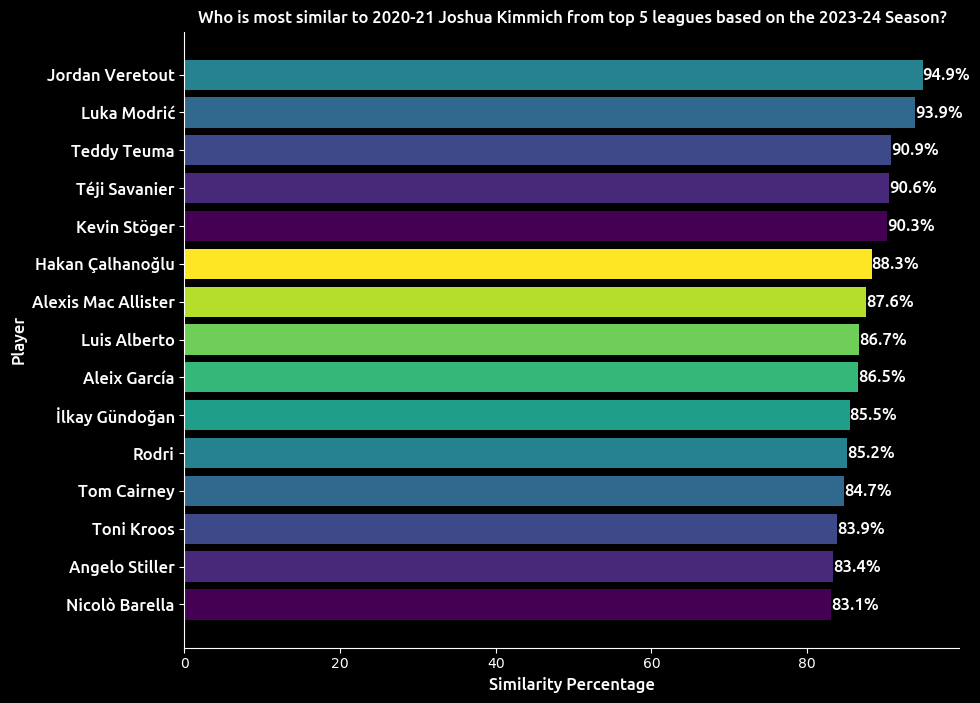

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_kimmich_2021', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_kimmich_2021'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to 2020-21 Joshua Kimmich from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [24]:
Gundogan=player_2024[player_2024['Player']=='İlkay Gündoğan']
Gundogan

Unnamed: 0          Player  Nation Pos      Squad        Comp  Age  \
112      1070.0  İlkay Gündoğan  de GER  MF  Barcelona  es La Liga  0.0   

       Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
112  1990.0  36.0    33.0  2994  33.3         0.15       0.42        0.12   

     G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
112          0.39      0.22          0.53        0.17            0.48   

     Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
112                61.0           34.0            55.7              19.0   

     Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
112               31.1           82.07                    1.26   

     Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
112                   11.29                   46.19                   25.26   

     Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
112                    2.31                      82.01   

     Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
112                       1.83                  1.02                     0.57   

     Carries_per_90  Total_Distance_per_90  \
112           48.29                  266.7   

     Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
112                               131.08                        2.13   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
112                2.64                         0.27               -1.14   

     Dispossessed_per_90  Passes_Received_per_90  \
112                -0.84                   63.33   

     Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
112                                3.48                        4.99   

     Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
112                     0.39                   3.33                   1.35   

     Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
112                  0.12              0.06                     0.12   

     Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
112                    0.0                    0.3                   0.06   

     Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
112                   0.0               0.0                     0.03   

     Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
112                    0.0            2163.0            2510.0   

     Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
112               86.2         35295.0          9085.0            1095.0   

     Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  \
112            1186.0               92.3              830.0   

     Passes_Medium_Att  Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  \
112              904.0                91.8            182.0            313.0   

     Passes_Long_Cmp%  Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  \
112              58.1            0.27        0.31       0.29         -0.04   

     Key_Passes_per_90  Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
112               2.91               5.65                        1.44   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
112                         0.12                       6.73   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
112                    75.38                    66.91   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
112                     8.14                     2.88                  0.48   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
112             0.51            4.71                    0.15   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
112                  4.2                     1.8                      1.5   

     Str_Corner_Kicks_per

In [25]:
params = [
    'Progressive_Passes_per_90', 
    'Goal_Creating_Action_90', 
    'Shot_Creating_Action_per90', 
    'xA_per_90', 
    'Touches_per_90', 
    'Passes_Penalty_Area_per_90', 
    'Pass_Live_Goal_per_90', 
    'Key_Passes_per_90', 
    'Passes_1/3_per_90', 
    'Passes_Attempted_per_90', 
    'Through_Balls_per_90', 
    'Touches_Att_3rd_per_90', 
    'Ball_Recoveries_per_90', 
    'Crosses_per_90', 
    'npxG+xAG_per90'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Robert Lewandowdski's stats from the percentile ranks DataFrame
gundogan_percentile_ranks = round(players_percentile_ranks.iloc[[112]],0)

# Print the percentile ranks for Robert Lewandowski
gundogan_percentile_ranks

Progressive_Passes_per_90  Goal_Creating_Action_90  \
112                       82.0                     81.0   

     Shot_Creating_Action_per90  xA_per_90  Touches_per_90  \
112                        95.0       97.0            93.0   

     Passes_Penalty_Area_per_90  Pass_Live_Goal_per_90  Key_Passes_per_90  \
112                        88.0                   83.0               97.0   

     Passes_1/3_per_90  Passes_Attempted_per_90  Through_Balls_per_90  \
112               81.0                     93.0                  93.0   

     Touches_Att_3rd_per_90  Ball_Recoveries_per_90  Crosses_per_90  \
112                    94.0                    50.0            92.0   

     npxG+xAG_per90  
112            97.0

In [26]:
gundogan_percentile_ranks_list = gundogan_percentile_ranks.values.flatten().tolist()

gundogan_percentile_ranks_list

[82.0,
 81.0,
 95.0,
 97.0,
 93.0,
 88.0,
 83.0,
 97.0,
 81.0,
 93.0,
 93.0,
 94.0,
 50.0,
 92.0,
 97.0]

In [27]:
image_path = "../Gundogan/Gundogan/Gundogan.jpg"
fdj_cropped = Image.open(image_path)


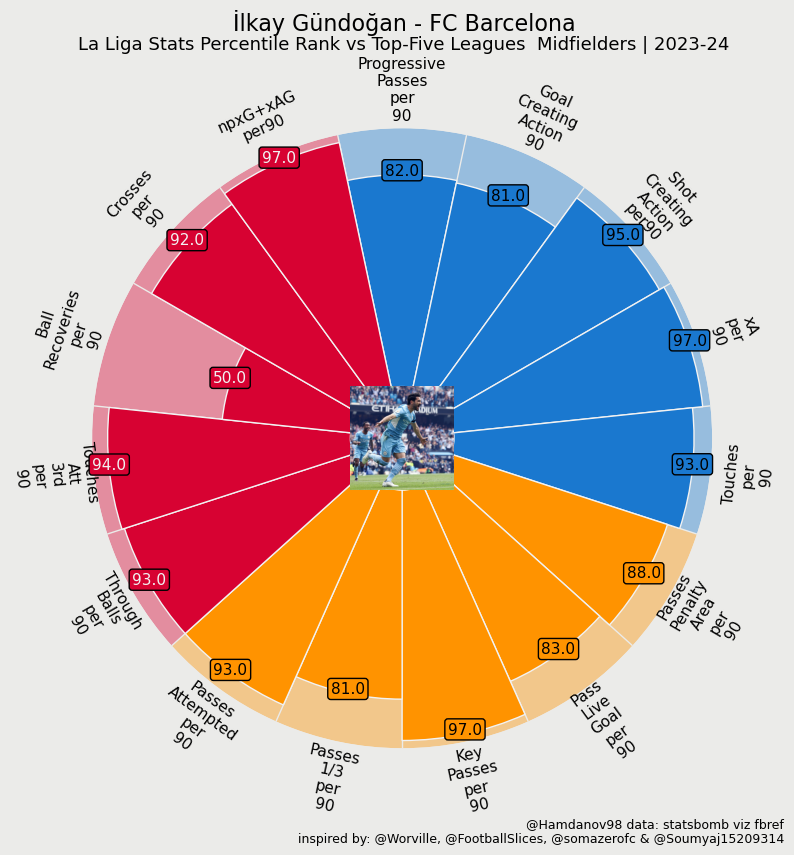

In [28]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    gundogan_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "İlkay Gündoğan - FC Barcelona", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues  Midfielders | 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Gundogan_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png
